# **1. What is Natural Language Processing (NLP)**

Natural Language Processing (NLP) is broadly defined as the automatic manipulation of natural language, like speech and text, by software. In other words, NLP is an important technique to help understand human language. NLP is a broad topic but we are mainly talking about how to use NLP techniques to do text mining and text analysis. In this tutorial, we will talk about text cleaning and data text processing, which are the essential steps to get data prepared for further text mining.



# **2. Text processing**
Usually, we need to do some proper text cleanning and processing before text mining (e.g. topic modeling). Here are the common steps to follow:

#### **Step 1: Cleaning text**
- (optional) Encoding. Usually you don't need to set up the encoding type or just set it as "utf-8" (which is suitable for all languages), but sometimes if your text data is non-English, you might need to look for the right encoding type. For example, "latin_1" is suitable for the languages in Western Europe and "gbk" for Chinese. Here is the [List of Python standard encodings](https://docs.python.org/3/library/codecs.html#standard-encodings).
- Lower casing;
- Remove special characters, such as emoji;
- Remove email address and url;
- Remove punctuation

#### **Step 2: Tokenisation**
In this step, the text is split into smaller units. Sentence-->words.

#### **Step 3: Remove stop words**
stop words are a set of commonly used words in a language. Example of stop words in English are "is", "a", "the" and etc. These words are usually not useful, so we normally remove them.

#### **Step 4: Stemming or Lemmatisation**
Stemming is the text standardization step where the words are stemmed or diminished to their root/base form. For example, words like ‘programmer’, ‘programming, ‘program’ will be stemmed to ‘program’. But the disadvantage of stemming is that it stems the words such that its root form loses the meaning or it is not diminished to a proper English word. For example, "manages" will be stemmed to "manag".

Lemmatisation also stems the words but try to make sure the words are not losing their meaning.Lemmatization has a pre-defined dictionary that stores the context of words and checks the word in the dictionary while diminishing. Thus, the words make more sense in this case, but lemmatisation might take longer to run.

We don't need to use both, but which one to choose? It depends. Sometimes stemming works fine then it's more effective. But if we need to get the actual meaning with actual words, then lemmatisation is more suitable.

#### **Step 5: Once the processing are done, put the tokens back together as text**

# **3. Practice with data example**

In [1]:
# Let's import data first
# Run the code and upload the csv file from your laptop
from google.colab import files
uploaded = files.upload()

Saving restaurant_tips_above10.csv to restaurant_tips_above10.csv


In [3]:
# once you upload the data to the cloud, you can read the data into dataframe.
# Remember, if you close the notebook or disconnect, you need to upload the file (run the code above) again before you read data.

import io
import pandas as pd

data = 'restaurant_tips_above10.csv' # change the csv file name to your file name that you uploaded
df = pd.read_csv(data, encoding='latin1')
#df = df[df['business_id'] == 'QoezRbYQncpRqyrLH6Iqjg']
print(df.head)

<bound method NDFrame.head of                      user_id             business_id  \
0     tsMF0FcFcHZ8i28WzWtQXw  dsfRniRgfbDjC8os848B6A   
1     661RwsBrt5ZbNhuipyhJcQ  x8-sTKZG59RUhgGj_kcyVg   
2     A4bsa7ykYRVCnb4h2vZALw  3Wy21heeDm8h2tSZfcj6OA   
3     tsMF0FcFcHZ8i28WzWtQXw  N4IFNpTn7kKfK9akJkerwQ   
4     __QLyY_W06q10ZfBQg7Dcg  fLZj2aOiA-xCE7oMLR0J-Q   
...                      ...                     ...   
7299  EgKupU289KSKaxZy8oz60A  APJQ-jyPYujo2Iw-OFOHlQ   
7300  RLM_ddOd89-62bSYBoPgCw  ZsQWhZaKUdRWeKErkLh76A   
7301  Kvp7NKtAWvdSw6aArTMmsw  8MzlreHr5tUxXM_Maqm1eg   
7302  jRvEtwTLWTFx6Goc5tjd_w  fTgB2w1k3slhjrYYhIyx1g   
7303  aMNpN9xJ4TfN9L80hpx0dw  41EGAPq5ckADVRe9t24A-w   

                                                   text              date  \
0     Experience Bern's by sitting at the bar too . ...    2020/3/5 01:28   
1                Brandon. Come here for your bbq. Gush.   2016/6/11 15:37   
2     30 minute wait for our drink order is unaccept...   2017/1/1

In [4]:
# Change your target_column to the column with review data

target_column = 'text'

## **3.1 Text cleaning**

In [5]:
# drop data with missing values in the 'content' column (target_column)
df = df.dropna(subset=[target_column])

In [6]:
# convert the relevant column to lowercase
df[target_column] = df[target_column].str.lower()

In [7]:
# remove contraction
!pip install contractions
import contractions
df[target_column] = df[target_column].map(lambda x: contractions.fix(x))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 8.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.7/110.7 kB 14.8 MB/s eta 0:00:00


In [8]:
# Remove unwanted characters/objects (e.g. url, email, emoji etc.). You don't need to run all of them, but just take the ones suitable for your case.
# import the re library. Re is a built-in python package, which can be used to work with Regular Expressions.

import re


# Remove new line characters ("/n")

df[target_column] = df[target_column].map(lambda x: re.sub('\s+', ' ', x))

# Remove url link
df[target_column] = df[target_column].apply(lambda x: re.sub('http://\S+|https://\S+', '', x))

# Remove email address
df[target_column] = df[target_column].map(lambda x: re.sub('\S*@\S*\s?', '', x))

# Remove emoji
# First, build a list of commonly used emojis
emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642"
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

# Then remove the emoji
df[target_column] = df[target_column].map(lambda x: re.sub(emoj, ' ', x))

# Remove non-word characters, so numbers and ___ etc
df[target_column] = df[target_column].str.replace("[^A-Za-z]", " ", regex = True)

# Remove overspace
df[target_column] = df[target_column].map(lambda x: re.sub('\s{2,}', " ", x))

In [9]:
# Remove punctuation
import string
df[target_column] = df[target_column].map(lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x))

## **3.2 Tokenisation & stop-words removal**

In [10]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [11]:
# create a list of the reviews from the 'Review' column
words = df[target_column].tolist()

# tokenise the words
from nltk.tokenize import word_tokenize

word_tokens = [] # create an empty list to put the tokenised words
for review in words:
    word_tokens.append(word_tokenize(review))

word_tokens[0]

['experience',
 'bern',
 's',
 'by',
 'sitting',
 'at',
 'the',
 'bar',
 'too',
 'order',
 'a',
 'delicious',
 'steak',
 'sandwich',
 'with',
 'their',
 'onion',
 'straws',
 'or',
 'order',
 'off',
 'the',
 'full',
 'menu',
 'it',
 'is',
 'definitely',
 'delicious']

In [12]:
# Start dealing with stopwords
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [13]:
from nltk.corpus import stopwords
# use English stopwords
stopwords = stopwords.words("english")
# you can also extend the stopwords list with more words that you want to remove
stopwords.extend([''])

# create a new list with stop words removed
tokens_without_stopwords = []
for review in word_tokens:
    tokens_without_stopwords.append([w for w in review if not w in stopwords])

tokens_without_stopwords[0]

['experience',
 'bern',
 'sitting',
 'bar',
 'order',
 'delicious',
 'steak',
 'sandwich',
 'onion',
 'straws',
 'order',
 'full',
 'menu',
 'definitely',
 'delicious']

## **3.3 Stemming or lemmatisation**

In [14]:
# option 1: stem the tokens
from nltk.stem import PorterStemmer
ps = PorterStemmer()

stemmed = []
for review in tokens_without_stopwords:
    stemmed.append([ps.stem(w) for w in review])

stemmed[0]

['experi',
 'bern',
 'sit',
 'bar',
 'order',
 'delici',
 'steak',
 'sandwich',
 'onion',
 'straw',
 'order',
 'full',
 'menu',
 'definit',
 'delici']

In [15]:
# put the tokens back together as text after stemming
import string
rejoin = []
for review in stemmed:
    x = " ".join(review) # join the text back together
    # remove punctuation from the reviews using the string package
    rejoin.append(x)

# add the reformed text to the data frame
df['filtered_review'] = rejoin

In [16]:
df # new columns are added to the original data

,user_id,business_id,text,date,compliment_count,filtered_review
0,tsMF0FcFcHZ8i28WzWtQXw,dsfRniRgfbDjC8os848B6A,experience bern s by sitting at the bar too or...,2020/3/5 01:28,6,experi bern sit bar order delici steak sandwic...
1,661RwsBrt5ZbNhuipyhJcQ,x8-sTKZG59RUhgGj_kcyVg,brandon come here for your bbq gush,2016/6/11 15:37,6,brandon come bbq gush
2,A4bsa7ykYRVCnb4h2vZALw,3Wy21heeDm8h2tSZfcj6OA,minute wait for our drink order is unacceptab...,2017/1/15 22:16,5,minut wait drink order unaccept servic other c...
3,tsMF0FcFcHZ8i28WzWtQXw,N4IFNpTn7kKfK9akJkerwQ,open for takeout and delivery now fyi they are...,2020/4/18 16:45,4,open takeout deliveri fyi donat meal front lin...
4,__QLyY_W06q10ZfBQg7Dcg,fLZj2aOiA-xCE7oMLR0J-Q,closed the corner of bad luck strikes again st...,2016/10/17 15:43,4,close corner bad luck strike stay tune urban c...
...,...,...,...,...,...,...
7299,EgKupU289KSKaxZy8oz60A,APJQ-jyPYujo2Iw-OFOHlQ,right next to my work solid experience every t...,2015/8/21 22:36,1,right next work solid experi everi time never ...
7300,RLM_ddOd89-62bSYBoPgCw,ZsQWhZaKUdRWeKErkLh76A,order a family meal if you want chicken strips...,2018/2/16 22:31,1,order famili meal want chicken strip piec chic...
7301,Kvp7NKtAWvdSw6aArTMmsw,8MzlreHr5tUxXM_Maqm1eg,my burger looked like shit that was stomped by...,2017/7/15 22:14,1,burger look like shit stomp feet
7302,jRvEtwTLWTFx6Goc5tjd_w,fTgB2w1k3slhjrYYhIyx1g,one of the best also very civic minded,2019/5/13 15:42,1,one best also civic mind


# **4. Basic text analysis**

## **4.2 Text vectorisation**

Text Vectorisation is the process of converting text into numerical representation. Once we convert text into numbers, then they can be usable features to be put into models. And with numbers we can do more further analysis and interpretation of the data as well.

Here we are introducing two methods of verctorisation:
- Term Document Matrix: create a binary vector where each index denotes the presence or absence of a word;
- Term Frequency-Inverse Document Frequency: weight each word by some form of importance score as well when creating term document matrix.

In [34]:
# For creating Term Document Matrix (DTM), CountVectorizer() from scikit-learn
from sklearn.feature_extraction.text import CountVectorizer

# set vectorizer - CountVectorizer for word counts
vectorizer = CountVectorizer(stop_words = (["great", 'food','good','place','best','get','order','like','tri','go','come','love','one','close','open','make']))
# create an array of word counts
doc_vec = vectorizer.fit_transform(df.text)

# convert this to a dataframe
df2 = pd.DataFrame(doc_vec.toarray(), columns=vectorizer.get_feature_names_out())

# set a threshold to drop infrequent words
threshold = 0.1

# drop words based on the threshold
df2 = df2.drop(df2.mean()[df2.mean() < threshold].index.values, axis=1) # Here find out the word with average word count lower than 0.1 and drop them

# join the two datasets together
dtm = df.join(df2, how='left',lsuffix='_left', rsuffix='_right')

In [35]:
df2.mean()

and     0.462212
are     0.145537
for     0.230148
have    0.119797
in      0.196468
is      0.366101
it      0.197563
not     0.209885
of      0.191950
on      0.141977
the     0.738636
they    0.167032
this    0.125685
to      0.313801
was     0.113499
with    0.114595
you     0.212623
dtype: float64

In [36]:
# write the dataframe out to csv and download
dtm.to_csv('dtm.csv',index=False)
files.download('dtm.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [37]:
# We can use the same process to creat document term matrix by considering the importance of the words
# Here we will use TfidfVectorizer() from scikit-learn to convert a collection of raw documents to a matrix of TF-IDF features.
from sklearn.feature_extraction.text import TfidfVectorizer

# set vectorizer - CountVectorizer for word counts
tfidfvectorizer = TfidfVectorizer(stop_words = (["great", 'food','good','place','best','get','order','like','tri','go','come','love','one','close','open','make']))

# create an array of word counts
vec = tfidfvectorizer.fit_transform(df.filtered_review)

# convert this to a dataframe
df3 = pd.DataFrame(vec.toarray(), columns=tfidfvectorizer.get_feature_names_out())

# set a threshold to drop infrequent words
threshold = 0.01

# drop words based on the threshold
df3 = df3.drop(df3.mean()[df3.mean() < threshold].index.values, axis=1) # Here find out the word with average word score lower than 0.001 and drop them

# join the two datasets together
tfidf = df.join(df3, how='left',lsuffix='_left', rsuffix='_right')

In [38]:
df3.mean()

pizza     0.010348
servic    0.015410
dtype: float64

In [39]:
tfidf.head()

,user_id,business_id,text,date,compliment_count,filtered_review,pizza,servic
0,tsMF0FcFcHZ8i28WzWtQXw,dsfRniRgfbDjC8os848B6A,experience bern s by sitting at the bar too or...,2020/3/5 01:28,6,experi bern sit bar order delici steak sandwic...,0.0,0.000000
1,661RwsBrt5ZbNhuipyhJcQ,x8-sTKZG59RUhgGj_kcyVg,brandon come here for your bbq gush,2016/6/11 15:37,6,brandon come bbq gush,0.0,0.000000
2,A4bsa7ykYRVCnb4h2vZALw,3Wy21heeDm8h2tSZfcj6OA,minute wait for our drink order is unacceptab...,2017/1/15 22:16,5,minut wait drink order unaccept servic other c...,0.0,0.167299
3,tsMF0FcFcHZ8i28WzWtQXw,N4IFNpTn7kKfK9akJkerwQ,open for takeout and delivery now fyi they are...,2020/4/18 16:45,4,open takeout deliveri fyi donat meal front lin...,0.0,0.000000
4,__QLyY_W06q10ZfBQg7Dcg,fLZj2aOiA-xCE7oMLR0J-Q,closed the corner of bad luck strikes again st...,2016/10/17 15:43,4,close corner bad luck strike stay tune urban c...,0.0,0.000000


In [40]:
# write the dataframe out to csv and download
tfidf.to_csv('tfidf.csv',index=False)
files.download('tfidf.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## **4.3 Visualisation based on the matrix**

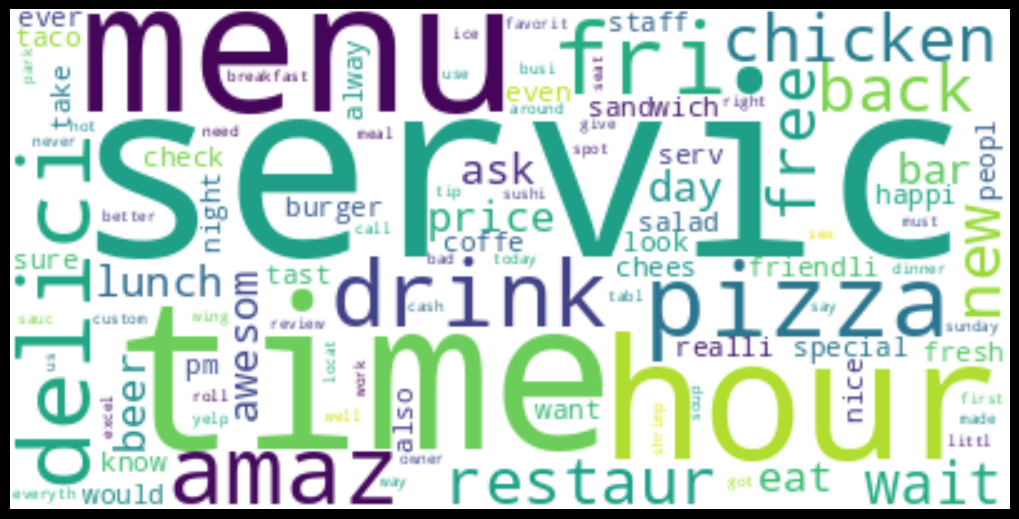

In [41]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

vectorizer = CountVectorizer(stop_words = (["great", 'food','good','place','best','get','order','like','tri','go','come','love','one','close','open','make']))
doc_vec = vectorizer.fit_transform(df.filtered_review)
count_df = pd.DataFrame(doc_vec.toarray(), columns=vectorizer.get_feature_names_out())

Cloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(count_df.T.sum(axis=1))
plt.figure(figsize=(10,5),facecolor ='k')
plt.imshow(Cloud, interpolation ='bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()